# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
len(df)

130

In [8]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### 1. Is the distribution normal?

In [11]:
import matplotlib.pyplot as plt

In [23]:
plt.hist(df.temperature,20)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")

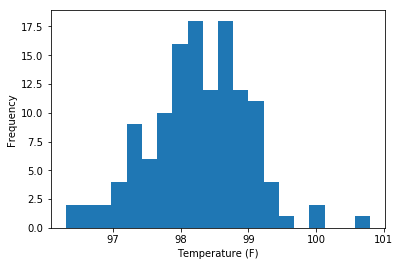

In [24]:
#Histogram of Temperature data
plt.show()

In [25]:
# Normal Probability Plot
import scipy.stats as stats

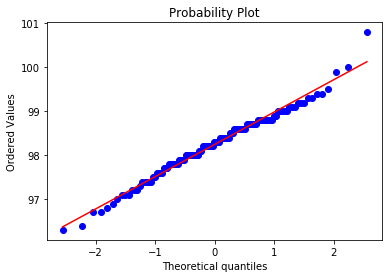

In [26]:
stats.probplot(df.temperature, plot = plt)
plt.show()

Histogrm of the temperature data seems to follow the bell curve of the normal distribution and is fairly symmetric. 
We can check for normality using the Normal Probability plot (above). Data seems to fit a straight line, with a few exceptions,
so we can conclude that the distribution of Temperature samples is normal.

#### 2.Is the sample size large? Are the observations independent?

In [27]:
len(df)

130

For the sake of statistical analysis, our sample of 130 is large enough. 
We have no information regarding the measured data points, but will assume that the data set was obtained from 130 different subjects, and all observations are independent.

#### 3.Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?

* We would use a one sample test in this case. We have one sample which we will use to make predictions about the population. We are not comparing two different samples.
* It is appropriate to use the z statistic for this sample, since our sample size is large enough. We would use the t statistic if our sample size was <30


In [30]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

##### Finding a 95% CI for the value of the true population mean
For a normal distribution 95.45% of the data is within 2 standard deviations from the mean
    * z-value = 2
    * sigma = std/sqrt(n) = 0.733183/sqrt(130) = 0.064
    * 2sigma = 0.129
    * Inrerval: mean +/- sigma = 98.249 +/- 0.129 
    * 95% CI = 98.12 - 98.38
Based on our sample we can be confident that there is a 95% chance the population mean temperature is between 98.12 and 98.38. So we can conclude that the true population mean is NOT 98.6

##### Repeating the calculation with the t statistic
    * t-statistic for 95% CI and 130 derees of freedom = 1.9784
    * sigma*t = 0.064* 1.9784 = 0.127
    * 95%CI = 98.12 - 98.38
    
Using the t-statistic gives us the same results as the z test. This is because when a sample is large enough (higher DF), t statistic approaches the values of the z statistic - for a normally distributed sample

#### 4.At what temperature should we consider someone's temperature to be "abnormal"?

Abnormal Temerature considered to be 1 degree away from average temperature. From the results above, we should consider temperatures below 97.12 and above 99.38 "abnormal"

#### 5.Is there a significant difference between males and females in normal temperature?

In [32]:
#Female Data
df[df.gender =='F'].temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [33]:
# Male Data
df[df.gender =='M'].temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

Use a 2 Sample, Single Tailed Test with a 95%CI

Difference in means: 98.393846 - 98.104615 = 0.289231

* Null Hypothesis: There is no difference between males and females in normal temperature (Mean of sampling distribution of difference of sample means =  0)
* Alternative Hypothesis: There is a differece between males and females in normal temperature
* Chose significance level of 95% (If there is less than 5 percent chance of getting the diference in means in the above sample - we can reject the null hypothesis.

Find a critical value for the difference in population means for which we can reject the null hypothesis. 

From z-table find z-value for ~95% (Since this is a one-sided test). Critical z-value = 1.65

Standard Deviation of distribution of difference in sample means = sqrt(std(F)^2/n + std(M)^2/n) = 0.1265  (where n = 65, std(M) = 0.698756, std(F) = 0.743488)

So, 0.1265*1.65 = 0.2087
Meaning there is only a 5% chance that if Null Hypothesis is true, the difference in means is more than 0.2087. 
Our sample difference in means is larger than the calculated critical value, meaning the probability of obtaining that resut is less than 5%. 
We can reject the null hypothesis, and conclude that there is a significant difference between males and females in normal temp


